# Electric Vehicle Population Data - Exploratory Data Analysis (EDA)

## Introduction
In this project, we explore a dataset containing information about electric vehicles. The dataset includes various features such as VIN, City, State, Model Year, Make, Model, Electric Vehicle Type, Electric Range, Base MSRP, and more. The goal of this analysis is to gain insights and understand the characteristics of electric vehicles in the dataset.

## Data Overview
The dataset contains 138,779 entries with 17 columns. Some columns have missing values, such as "County," "Model," "Legislative District," "Vehicle Location," and "Electric Utility." These missing values will need to be handled during data preprocessing.

## Data Preprocessing
Before proceeding with the EDA, we need to preprocess the data, which includes handling missing values and encoding categorical variables.

## Feature Engineering
We can create additional features based on existing columns to derive valuable insights and improve model performance.

## Descriptive Statistics
From the descriptive statistics, we can observe that the "Electric Range" has a wide range of values, from 0 to 337, with a mean value of approximately 72.3. Similarly, the "Base MSRP" column has a wide range of values, with a mean value of approximately 1404.82.

## Data Visualization
We will use various data visualization techniques to explore the relationships between unique features and identify any trends or patterns in the data. We can create visualizations such as bar plots, histograms, box plots, and scatter plots to gain a better understanding of the dataset.


## Conclusion
The exploratory data analysis will help us gain valuable insights into the electric vehicle population data. We will be able to understand the distribution of different features, identify correlations, and discover patterns. The visualizations will provide a clear representation of the data trends and help us make informed decisions for further analysis or modeling.

Please note that this is a summary of the EDA process and findings. The actual analysis will involve detailed visualizations, statistical tests, and interpretation of the results.

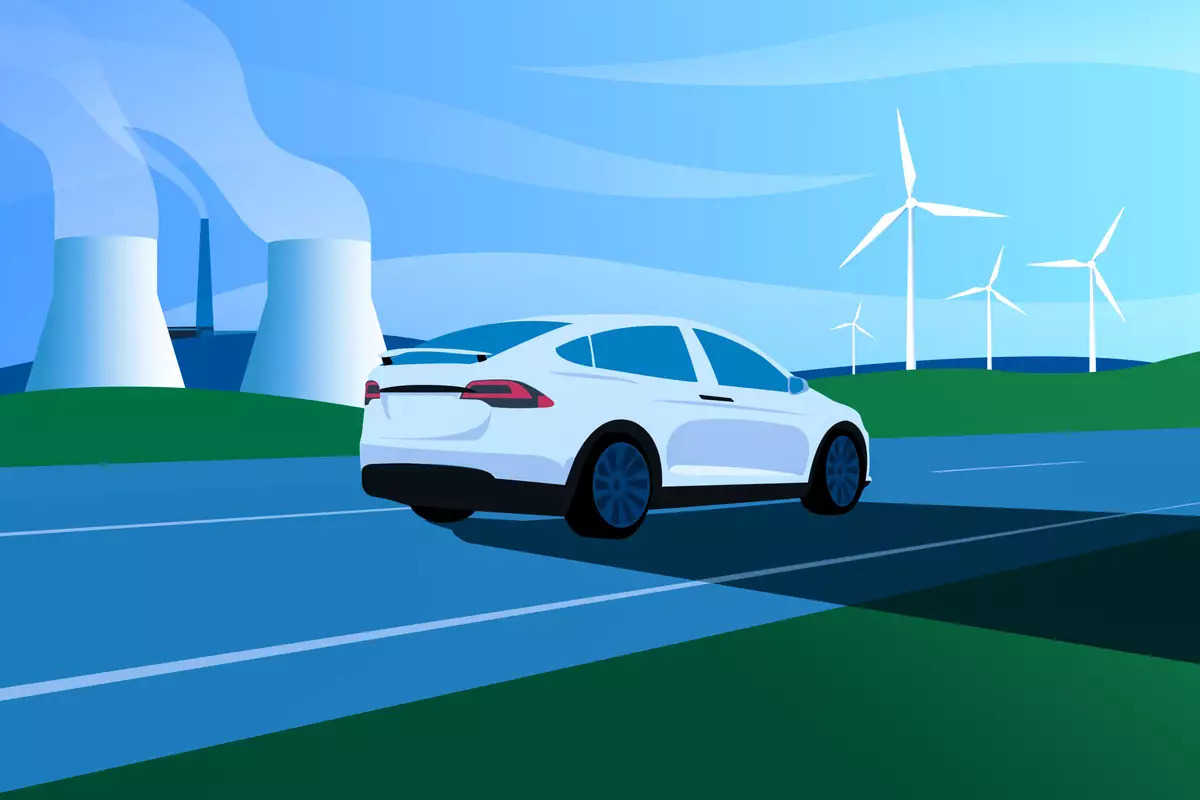

## import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

# Data Gathering

In [ ]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')

### Information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138779 entries, 0 to 138778
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         138779 non-null  object 
 1   County                                             138776 non-null  object 
 2   City                                               138776 non-null  object 
 3   State                                              138779 non-null  object 
 4   Postal Code                                        138776 non-null  float64
 5   Model Year                                         138779 non-null  int64  
 6   Make                                               138779 non-null  object 
 7   Model                                              138493 non-null  object 
 8   Electric Vehicle Type                              138779 non-null  object

In [ ]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                286
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 315
DOL Vehicle ID                                         0
Vehicle Location                                       6
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [ ]:
# HOT FUNCTION
def col_sum(data):
    col=[]
    n_null=[]
    n_unique=[]
    unique=[]
    duplicated=[]
    dType=[]

    for column in data.columns:
        col.append(column)
        n_null.append(data[column].isnull().sum())
        n_unique.append(data[column].nunique())
        unique.append(data[column].unique())
        duplicated.append(data[column].duplicated().sum())
        dType.append(data[column].dtype)
    return pd.DataFrame({"Columns ": col , "Data Type ": dType ,"Null ": n_null,
                         "unique" : unique ,"n_unique" : n_unique ,
                         "Duplicated ": duplicated})


In [ ]:
col_sum(df)

,Columns,Data Type,Null,unique,n_unique,Duplicated
0,VIN (1-10),object,0,"[1N4AZ0CP5D, 1N4AZ1CP8K, 5YJXCAE28L, SADHC2S1X...",9211,129568
1,County,object,3,"[Kitsap, King, Thurston, Snohomish, Yakima, Sp...",173,138605
2,City,object,3,"[Bremerton, Port Orchard, Seattle, Olympia, Ev...",655,138123
3,State,object,0,"[WA, NY, CA, AP, MD, BC, TX, SC, HI, IL, CO, U...",45,138734
4,Postal Code,float64,3,"[98310.0, 98366.0, 98199.0, 98503.0, 98204.0, ...",789,137989
5,Model Year,int64,0,"[2013, 2019, 2020, 2011, 2018, 2014, 2022, 201...",22,138757
6,Make,object,0,"[NISSAN, TESLA, JAGUAR, CHEVROLET, FORD, JEEP,...",36,138743
7,Model,object,286,"[LEAF, MODEL X, I-PACE, VOLT, MODEL 3, FUSION,...",126,138652
8,Electric Vehicle Type,object,0,"[Battery Electric Vehicle (BEV), Plug-in Hybri...",2,138777
9,Clean Alternative Fuel Vehicle (CAFV) Eligibility,object,0,"[Clean Alternative Fuel Vehicle Eligible, Not ...",3,138776


In [ ]:
col=['DOL Vehicle ID','2020 Census Tract','County','Legislative District']
df_new=df[col]

In [ ]:
df_new.shape

(138779, 4)

In [ ]:
col_sum(df_new)

,Columns,Data Type,Null,unique,n_unique,Duplicated
0,DOL Vehicle ID,int64,0,"[214384901, 271008636, 8781552, 8308492, 24552...",138779,0
1,2020 Census Tract,float64,3,"[53035080400.0, 53035092300.0, 53033005600.0, ...",2049,136729
2,County,object,3,"[Kitsap, King, Thurston, Snohomish, Yakima, Sp...",173,138605
3,Legislative District,float64,315,"[23.0, 26.0, 36.0, 2.0, 21.0, 13.0, 6.0, 35.0,...",49,138729


1. **DOL Vehicle ID** is the unique identifier for our data


2. **VIN (1-10)** column is not unique which might seem counterintutive but in reality it is truncated and the first 9 digits explain world manufacturer info and vehicle descriptor section and the 10th digit encodes the model year.


3. We also notice few missing values. The model and legislative distict columns in particular have quite a few of them and we will look to impute it or drop later.


4. We also drop **DOL Vehicle ID**, **County**, **Legislative District** and **2020 Census Tract** column as it is not relevant to our anaylsis.


In [ ]:
df1=df.drop(col,axis=1)
df1.shape

(138779, 13)

# **Dealing with NaN values**

In [ ]:
col_sum(df1)

,Columns,Data Type,Null,unique,n_unique,Duplicated
0,VIN (1-10),object,0,"[1N4AZ0CP5D, 1N4AZ1CP8K, 5YJXCAE28L, SADHC2S1X...",9211,129568
1,City,object,3,"[Bremerton, Port Orchard, Seattle, Olympia, Ev...",655,138123
2,State,object,0,"[WA, NY, CA, AP, MD, BC, TX, SC, HI, IL, CO, U...",45,138734
3,Postal Code,float64,3,"[98310.0, 98366.0, 98199.0, 98503.0, 98204.0, ...",789,137989
4,Model Year,int64,0,"[2013, 2019, 2020, 2011, 2018, 2014, 2022, 201...",22,138757
5,Make,object,0,"[NISSAN, TESLA, JAGUAR, CHEVROLET, FORD, JEEP,...",36,138743
6,Model,object,286,"[LEAF, MODEL X, I-PACE, VOLT, MODEL 3, FUSION,...",126,138652
7,Electric Vehicle Type,object,0,"[Battery Electric Vehicle (BEV), Plug-in Hybri...",2,138777
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility,object,0,"[Clean Alternative Fuel Vehicle Eligible, Not ...",3,138776
9,Electric Range,int64,0,"[75, 150, 293, 234, 73, 53, 220, 19, 21, 330, ...",102,138677


In [ ]:
# present all rows contain NaN in City
df1[df1['City'].isnull()]

,VIN (1-10),City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location,Electric Utility
2537,1N4AZ0CP1D,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,NaN,NaN
6788,5YJ3E1EA5K,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,NaN
9467,5YJRE11B48,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,NaN


In [ ]:
## Now we see that all 3 rows contatin NaN in City contain NaN in other columns so let's drop this 3 rows

df1=df1.dropna(subset=['City'])
# to be sure ther are deleted
df1[df1['City'].isnull()]

,VIN (1-10),City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location,Electric Utility


In [ ]:
df['Vehicle Location'].value_counts()[:10]

POINT (-122.12301999999994 47.67668000000003)     3563
POINT (-122.1873 47.82024500000006)               2467
POINT (-122.20263999999997 47.67850000000004)     2448
POINT (-122.20190499999995 47.61385000000007)     2341
POINT (-122.16936999999996 47.571015000000045)    2274
POINT (-122.31849999999997 47.679490000000044)    2203
POINT (-122.03132659999994 47.62857820000005)     1986
POINT (-122.2371867 47.58229970000008)            1958
POINT (-122.15166499999998 47.75855000000007)     1957
POINT (-122.20928499999997 47.71124000000003)     1892
Name: Vehicle Location, dtype: int64

In [ ]:
# Fill na in Vehicle Location with most comon location  using mode iloc[0]
df1['Vehicle Location']=df1['Vehicle Location'].fillna(df1['Vehicle Location'].mode().iloc[0])

In [ ]:
col_sum(df1)

,Columns,Data Type,Null,unique,n_unique,Duplicated
0,VIN (1-10),object,0,"[1N4AZ0CP5D, 1N4AZ1CP8K, 5YJXCAE28L, SADHC2S1X...",9210,129566
1,City,object,0,"[Bremerton, Port Orchard, Seattle, Olympia, Ev...",655,138121
2,State,object,0,"[WA, NY, CA, MD, TX, SC, HI, IL, CO, UT, LA, G...",43,138733
3,Postal Code,float64,0,"[98310.0, 98366.0, 98199.0, 98503.0, 98204.0, ...",789,137987
4,Model Year,int64,0,"[2013, 2019, 2020, 2011, 2018, 2014, 2022, 201...",22,138754
5,Make,object,0,"[NISSAN, TESLA, JAGUAR, CHEVROLET, FORD, JEEP,...",36,138740
6,Model,object,286,"[LEAF, MODEL X, I-PACE, VOLT, MODEL 3, FUSION,...",126,138649
7,Electric Vehicle Type,object,0,"[Battery Electric Vehicle (BEV), Plug-in Hybri...",2,138774
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility,object,0,"[Clean Alternative Fuel Vehicle Eligible, Not ...",3,138773
9,Electric Range,int64,0,"[75, 150, 293, 234, 73, 53, 220, 19, 21, 330, ...",102,138674


<Axes: >

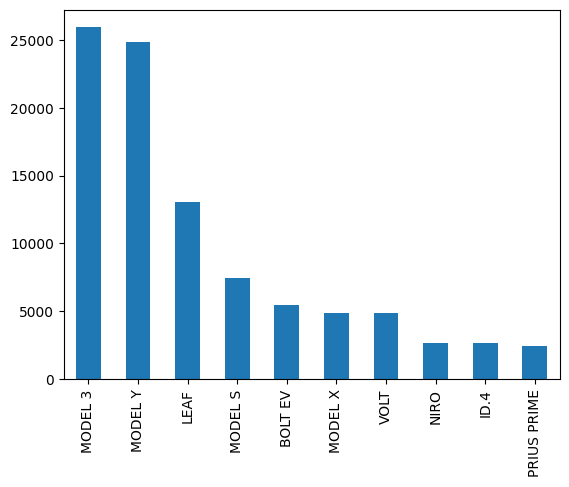

In [ ]:
# [Model] now let's dealing with the Model Column
df1['Model'].value_counts().head(10).plot(kind='bar')

I think i suppose to fill this column with other way not with the most common


In [ ]:
# mising data in Model by VIN (1-10)

df1[df1['Model'].isnull()]['VIN (1-10)'].apply(lambda x : x[2:6]).unique()

array(['4ED3'], dtype=object)

In [ ]:
df_4ED3=df1[df1['VIN (1-10)'].str.contains('4ED3')]

In [ ]:
df_4ED3[['Model','Model Year','Electric Vehicle Type', 'Make']]

,Model,Model Year,Electric Vehicle Type,Make
191,C40,2023,Battery Electric Vehicle (BEV),VOLVO
249,C40,2023,Battery Electric Vehicle (BEV),VOLVO
450,C40,2022,Battery Electric Vehicle (BEV),VOLVO
518,XC40,2021,Battery Electric Vehicle (BEV),VOLVO
632,XC40,2021,Battery Electric Vehicle (BEV),VOLVO
...,...,...,...,...
138229,XC40,2021,Battery Electric Vehicle (BEV),VOLVO
138249,XC40,2022,Battery Electric Vehicle (BEV),VOLVO
138336,XC40,2022,Battery Electric Vehicle (BEV),VOLVO
138448,XC40,2022,Battery Electric Vehicle (BEV),VOLVO


In [ ]:
model_null = df_4ED3[df_4ED3['Model'].isnull()]
year_per_model=model_null.groupby('Model Year')['Model'].unique()

In [ ]:
year_per_model

Model Year
2023    [nan]
Name: Model, dtype: object

In [ ]:
print(df_4ED3['Model'].unique())
print(df_4ED3['Make'].unique())

['C40' 'XC40' nan]
['VOLVO']


In [ ]:
df_4ED3.groupby(['Model'])['Model Year'].value_counts()


Model  Model Year
C40    2023          188
       2022          122
XC40   2022          245
       2021          241
       2023            8
Name: Model Year, dtype: int64

now we know the model year contain the null values is 2023
and the model is C40

In [ ]:
df1.fillna({'Model':'C40'},inplace = True)


In [ ]:
col_sum(df1)

,Columns,Data Type,Null,unique,n_unique,Duplicated
0,VIN (1-10),object,0,"[1N4AZ0CP5D, 1N4AZ1CP8K, 5YJXCAE28L, SADHC2S1X...",9210,129566
1,City,object,0,"[Bremerton, Port Orchard, Seattle, Olympia, Ev...",655,138121
2,State,object,0,"[WA, NY, CA, MD, TX, SC, HI, IL, CO, UT, LA, G...",43,138733
3,Postal Code,float64,0,"[98310.0, 98366.0, 98199.0, 98503.0, 98204.0, ...",789,137987
4,Model Year,int64,0,"[2013, 2019, 2020, 2011, 2018, 2014, 2022, 201...",22,138754
5,Make,object,0,"[NISSAN, TESLA, JAGUAR, CHEVROLET, FORD, JEEP,...",36,138740
6,Model,object,0,"[LEAF, MODEL X, I-PACE, VOLT, MODEL 3, FUSION,...",126,138650
7,Electric Vehicle Type,object,0,"[Battery Electric Vehicle (BEV), Plug-in Hybri...",2,138774
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility,object,0,"[Clean Alternative Fuel Vehicle Eligible, Not ...",3,138773
9,Electric Range,int64,0,"[75, 150, 293, 234, 73, 53, 220, 19, 21, 330, ...",102,138674


we are done with Nulls

# **Visualization**

In [ ]:
city_10=df1['City'].value_counts()[:10]
state_10=df1['State'].value_counts()[:10]
model10=df1['Model'].value_counts()[:10]
Model_Year_10=df1['Model Year'].value_counts()[:10]
Make_10=df1['Make'].value_counts()[:10]
Electric_Vehicle_Type_10=df1['Electric Vehicle Type'].value_counts()[:10]
CAFV_10=df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()[:10]
Electric_Utility_10=df1['Electric Utility'].value_counts()[:10]

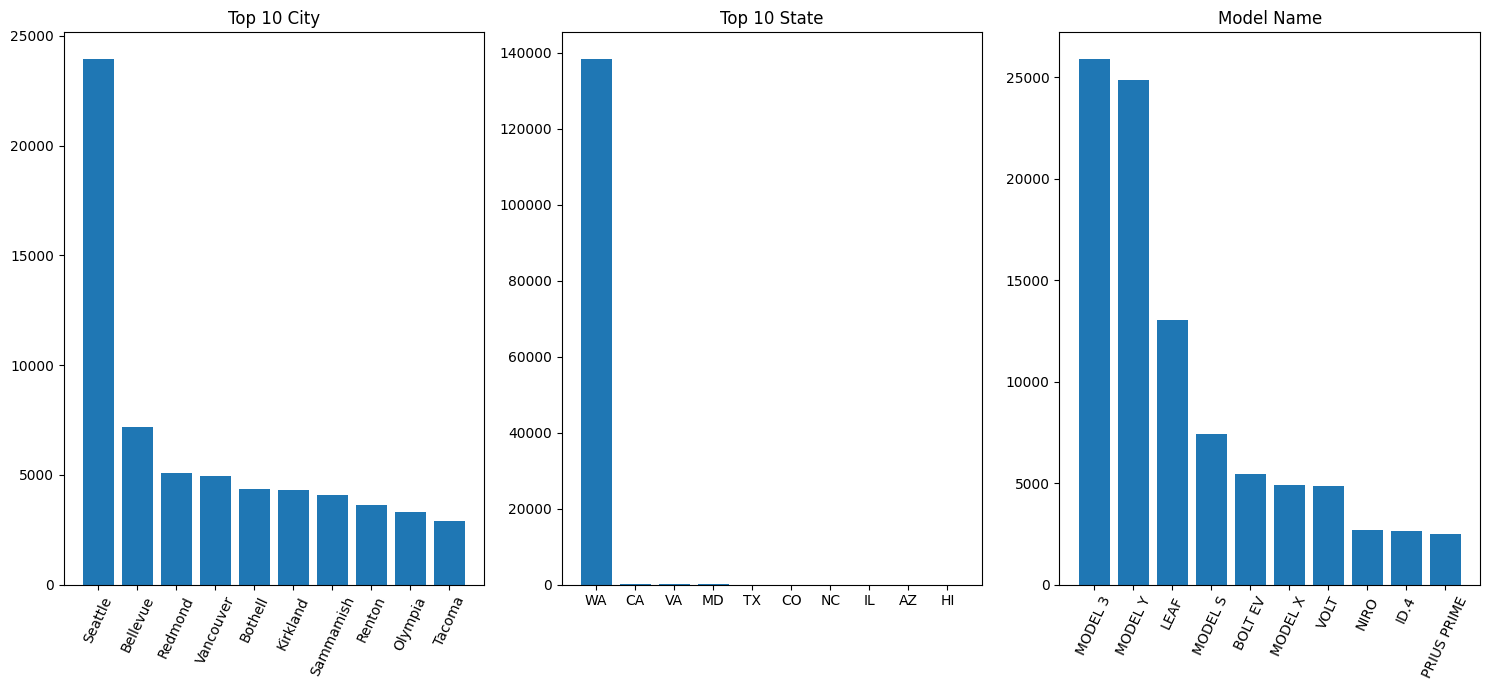

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.bar(city_10.index, city_10.values)
plt.gca().set_title('Top 10 City')
plt.xticks(rotation=65)


plt.subplot(1, 3, 2)
plt.bar(state_10.index, state_10.values)
plt.gca().set_title('Top 10 State')


plt.subplot(1, 3, 3)
plt.bar(model10.index, model10.values)
plt.gca().set_title('Model Name')
plt.xticks(rotation=65)

plt.tight_layout()
plt.show()

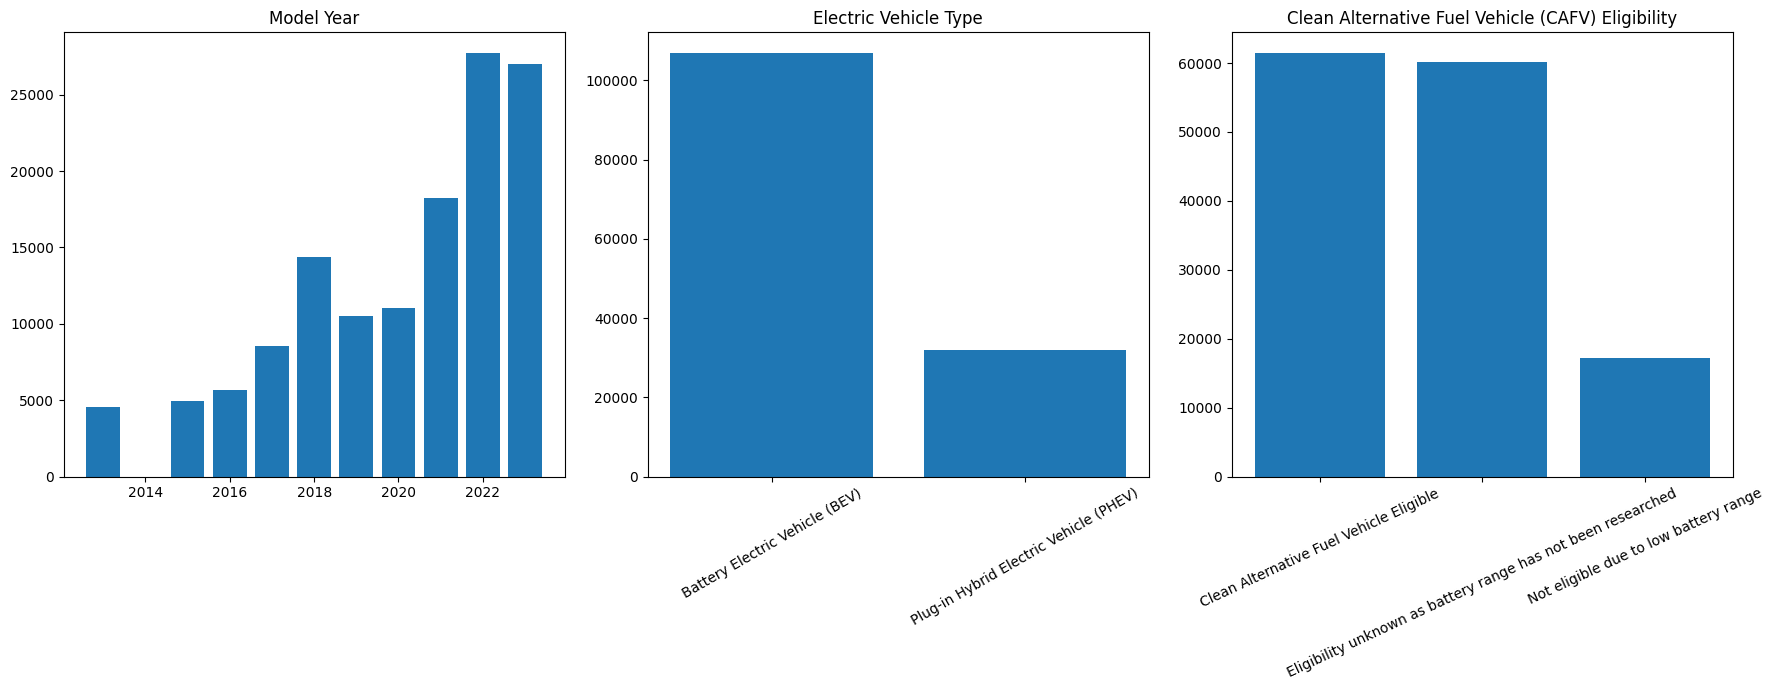

In [ ]:
plt.figure(figsize=(18, 7))


plt.subplot(1, 3, 1)
plt.bar(Model_Year_10.index, Model_Year_10.values)
plt.gca().set_title('Model Year')

plt.subplot(1, 3, 2)
plt.bar(Electric_Vehicle_Type_10.index, Electric_Vehicle_Type_10.values)
plt.gca().set_title('Electric Vehicle Type')
plt.xticks(rotation=30)

plt.subplot(1,3,3)
plt.bar(CAFV_10.index, CAFV_10.values)
plt.gca().set_title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.xticks(rotation=25)


plt.tight_layout()
plt.show()

In [ ]:
descripe=df1.describe()
descripe

,Postal Code,Model Year,Electric Range,Base MSRP
count,138776.000000,138776.000000,138776.000000,138776.000000
mean,98172.902404,2019.772237,72.303612,1404.815134
std,2411.731323,3.012813,97.772180,9543.903133
min,1730.000000,1997.000000,0.000000,0.000000
25%,98052.000000,2018.000000,0.000000,0.000000
50%,98122.000000,2021.000000,21.000000,0.000000
75%,98370.000000,2022.000000,126.000000,0.000000
max,99701.000000,2024.000000,337.000000,845000.000000


<Axes: >

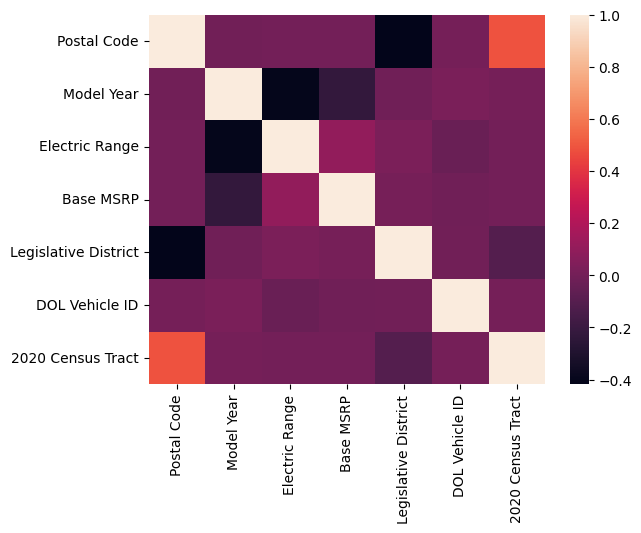

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df1.head(3)

,VIN (1-10),City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location,Electric Utility
0,1N4AZ0CP5D,Bremerton,WA,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC
1,1N4AZ1CP8K,Port Orchard,WA,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC
2,5YJXCAE28L,Seattle,WA,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


## visualize columns dependent to another columns

In [ ]:
df1.groupby('City')['Electric Range'].value_counts().head(10)

City      Electric Range
Aberdeen  0                 35
          53                 9
          19                 7
          215                7
          21                 6
          25                 5
          26                 4
          220                4
          47                 3
          87                 3
Name: Electric Range, dtype: int64

<Axes: xlabel='City,Electric Range'>

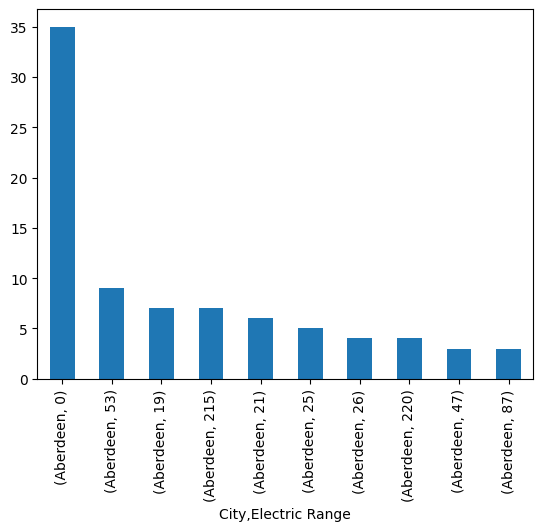

In [ ]:
df1.groupby('City')['Electric Range'].value_counts().head(10).plot(kind='bar')


In [ ]:
#Calculating Percent Change over a decade
model_year_data = df1['Model Year'].value_counts().sort_index(ascending = False).head(11)
decade_change = model_year_data.pct_change(periods=-1) * 100


Text(0, 0.5, '% Change')

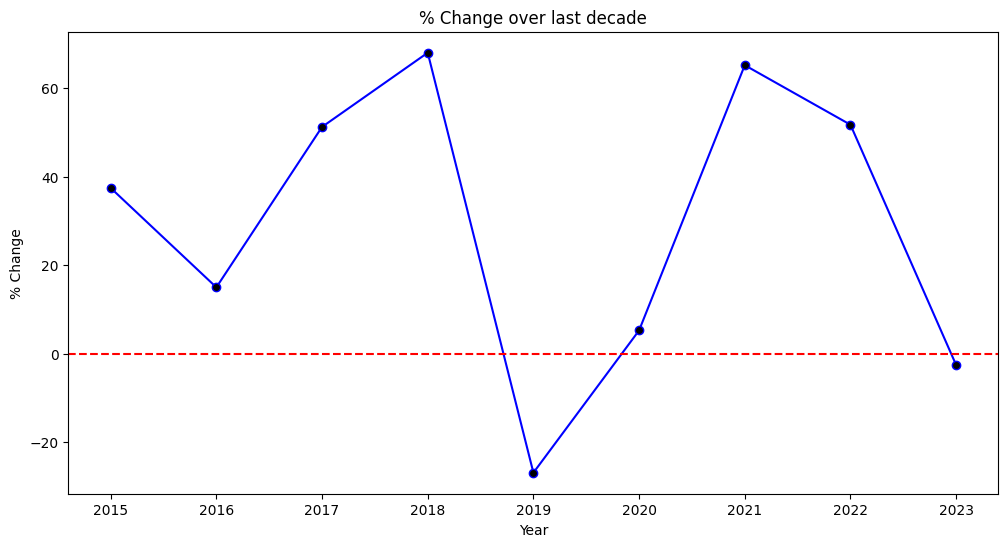

In [ ]:
#Plotting Percent Change except for 2023
plt.figure(figsize=(12,6))
plt.plot(decade_change[1:],color='b',marker='o',markerfacecolor='k')
plt.axhline(y=0,color='red',ls='--')
plt.title('% Change over last decade')
plt.xlabel('Year')
plt.ylabel('% Change')

Text(0.5, 1.0, 'Electric Range of Vehicles over a Decade')

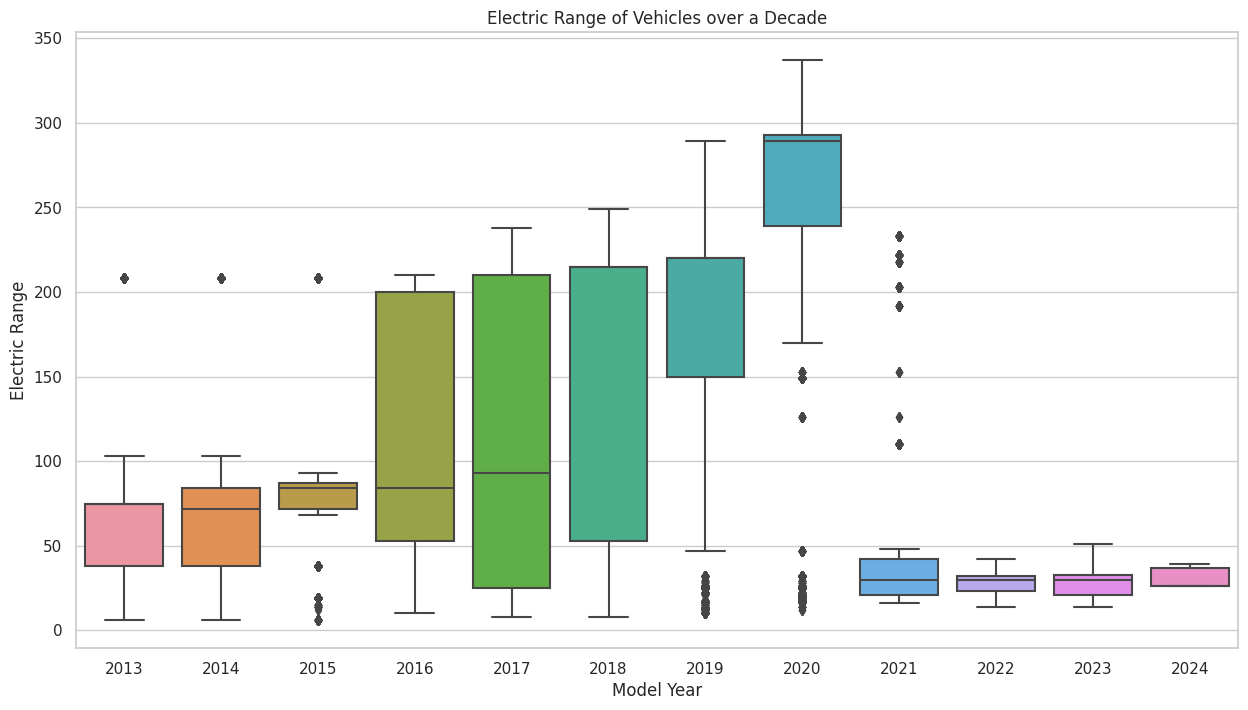

In [ ]:
# select the duration from 2012 to 2023
after_2012 = df1[(df1['Electric Range'] > 0) & (df1['Model Year'] > 2012)]

sns.set(style='whitegrid')

plt.figure(figsize=(15, 8))
sns.boxplot(data=after_2012, x='Model Year', y='Electric Range')
plt.title("Electric Range of Vehicles over a Decade")


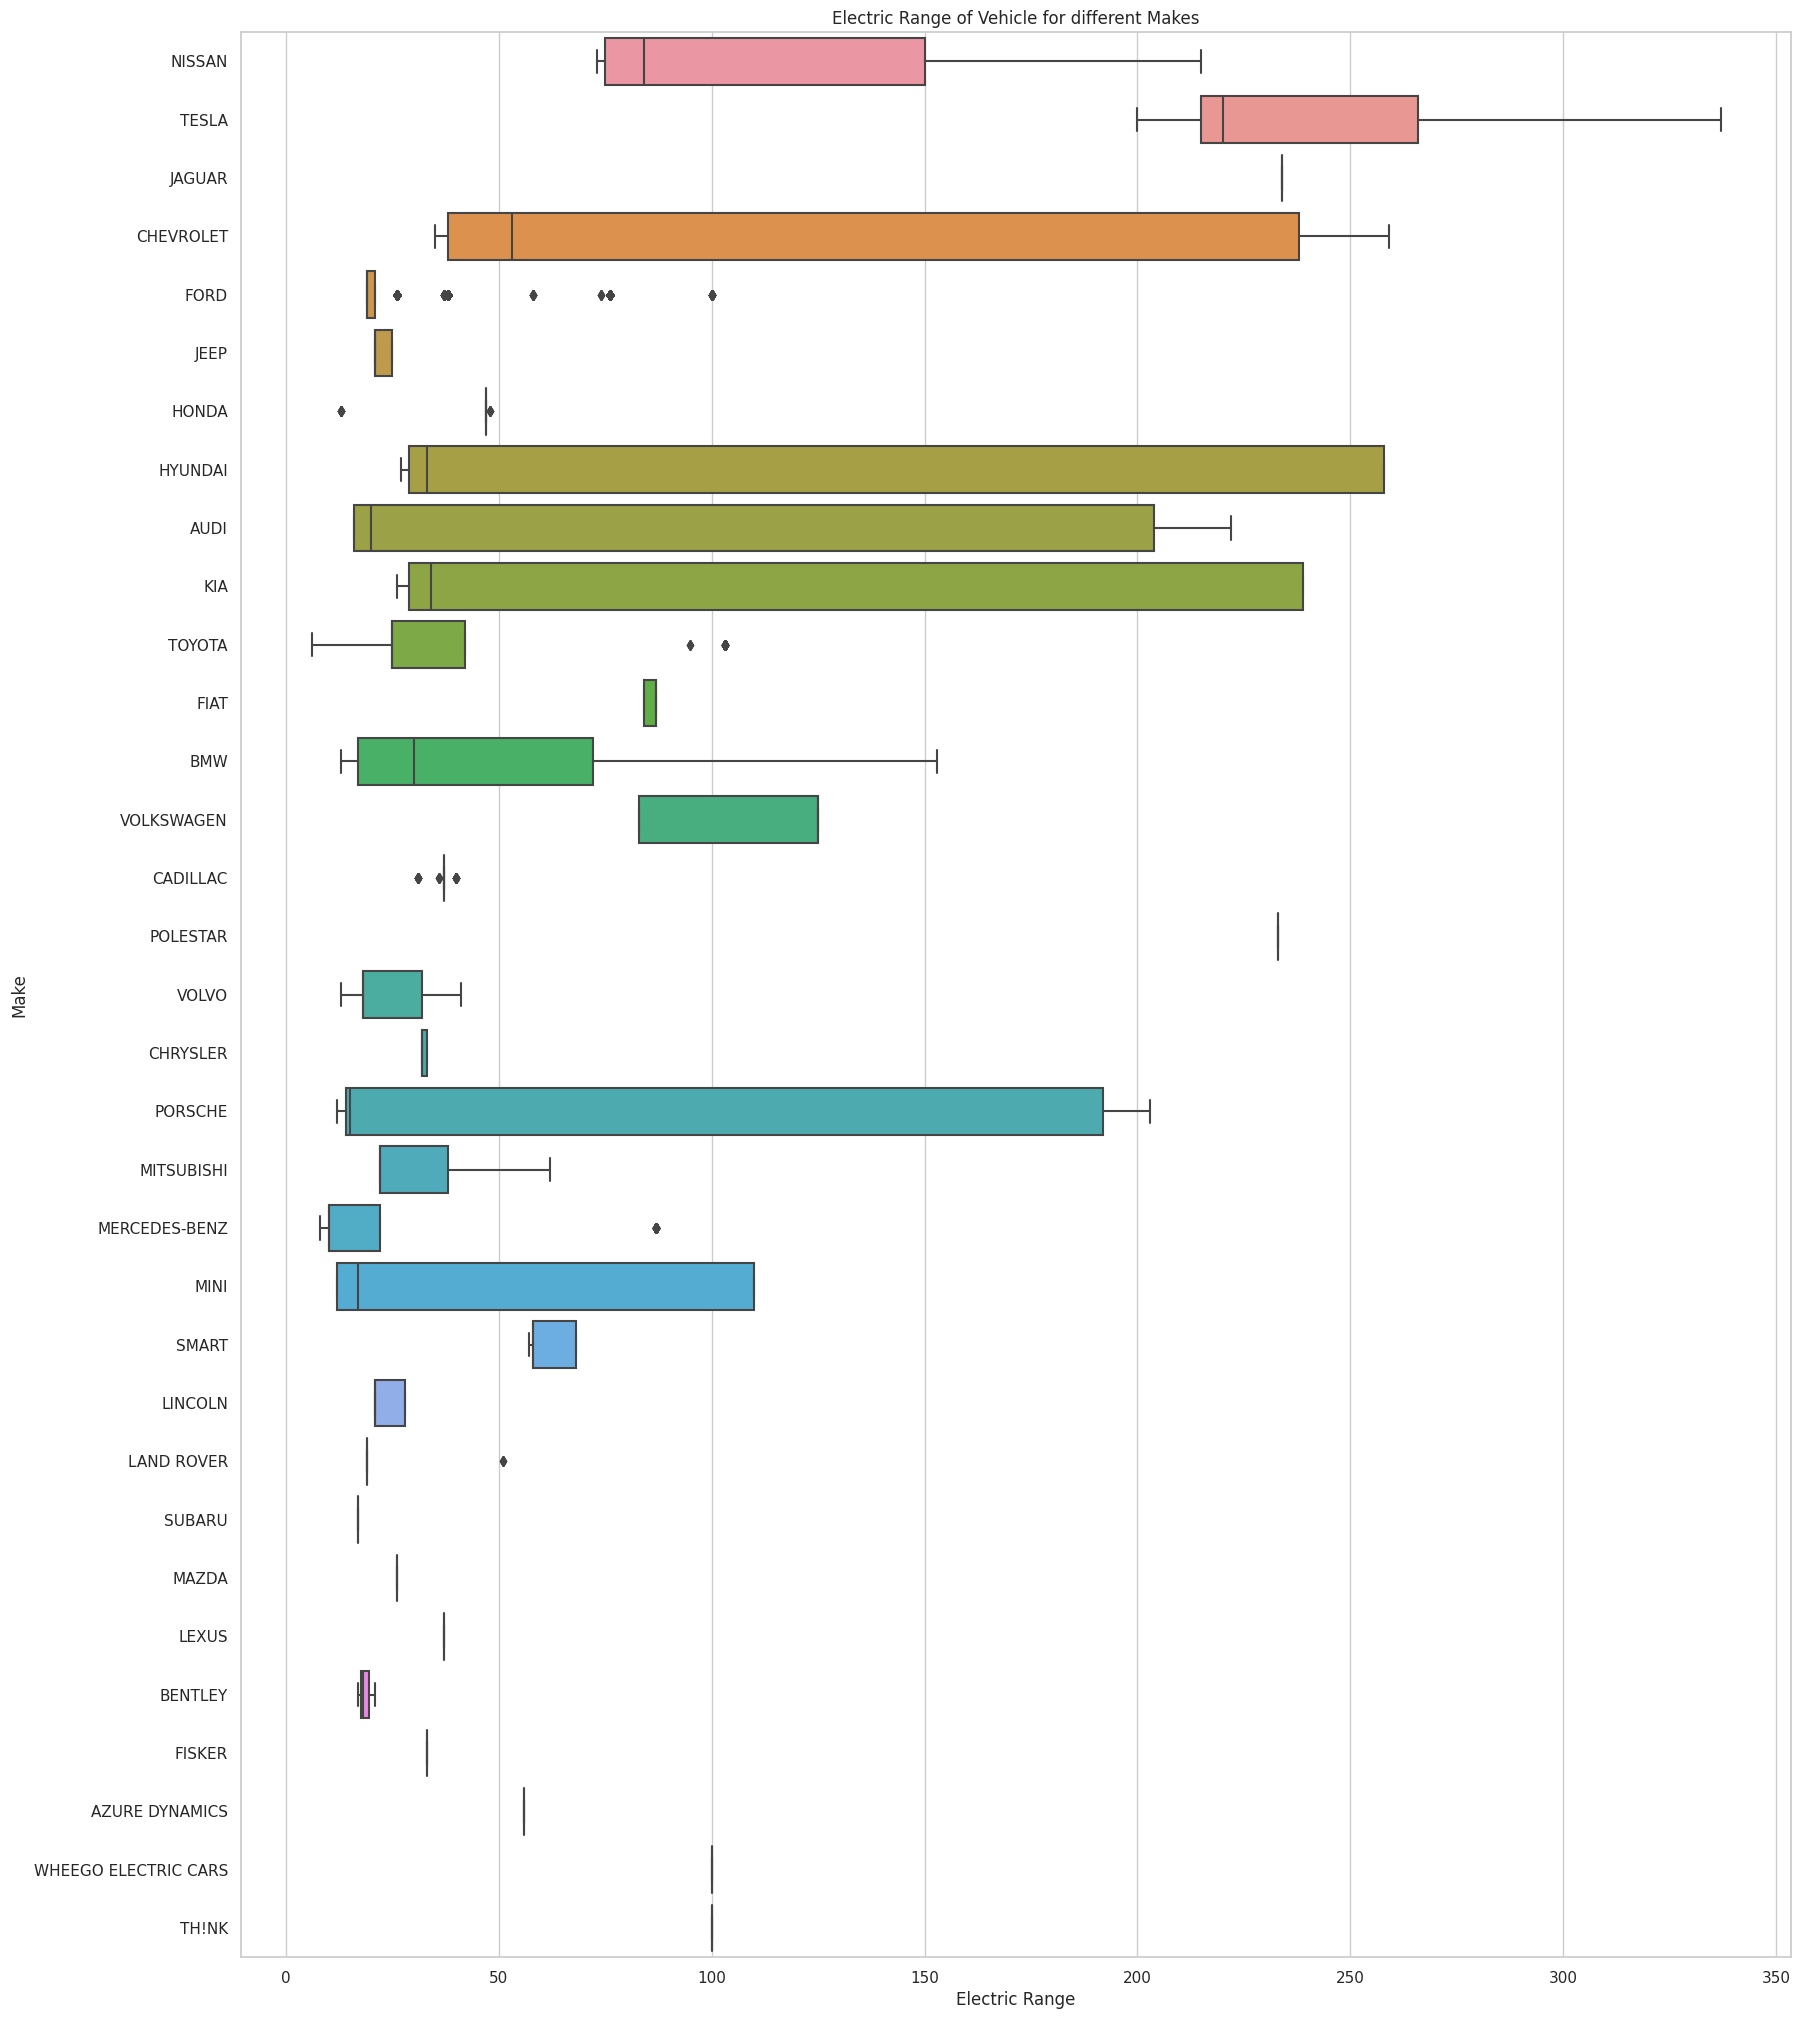

In [ ]:
# Electric Range is bigger than 0
electric_clean=df1[df1['Electric Range']>0]

plt.figure(figsize=(20,25))
sns.boxplot(electric_clean, x='Electric Range',y ='Make' )
plt.title("Electric Range of Vehicle for different Makes")

plt.show()

In [ ]:
 df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         61388
Eligibility unknown as battery range has not been researched    60162
Not eligible due to low battery range                           17226
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

That's mean we have 3 labels one for Eligible, Not eligible and unknown

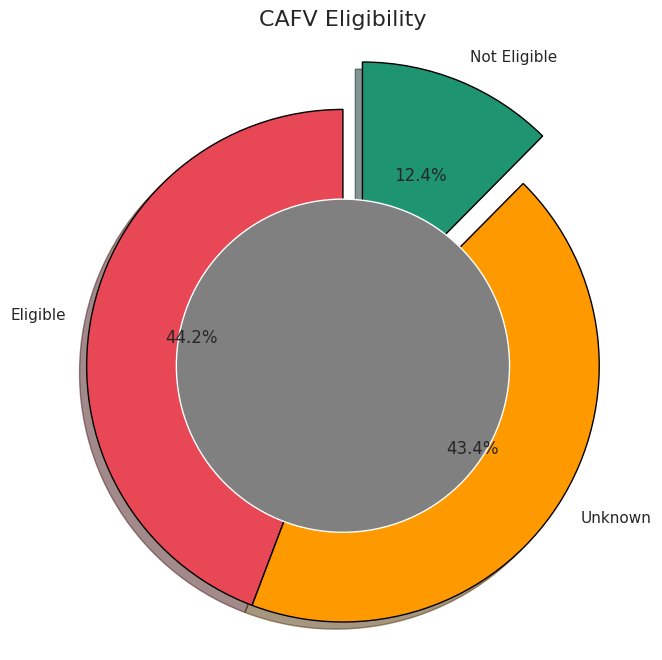

In [ ]:
# Pie chart for CAFV Eligibility
fig, ax = plt.subplots(figsize=(8, 8))

# Sizes and labels
sizes = df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
labels = 'Eligible', 'Unknown', 'Not Eligible'

# Colors for the pie chart wedges
colors = ['#E84855', '#ff9900','#1e9570']

# Additional parameters for the pie chart
explode = (0, 0, 0.2)  # To explode  wedge
shadow = True         # To add shadows to the wedges
startangle = 90       # To set the starting angle of the chart

# Plot the pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=shadow,
       startangle=startangle, wedgeprops={'edgecolor': 'black'}, colors=colors)

# Add a circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.65, fc='gray')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set the title for the pie chart
ax.set_title('CAFV Eligibility', fontsize=16)

# Display the pie chart
plt.show()

# end of Analysis and  Visualization